In [1]:
import networkx as nx
import matplotlib
%matplotlib inline
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import random
import time

DATAFOLDER = './data'


In [2]:
# # ONLY IF COLAB 
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/src/NetworkSyncCapstone
# DATAFOLDER = './data'

In [ ]:
# Only if gradient
DATAFOLDER='/storage/data'

In [2]:
import sys
sys.path.append('./Metropolis/')
sys.path.append('./src')

# Running continuous 

In [2]:
import networkx as nx
import matplotlib
%matplotlib inline
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import random
import time

DATAFOLDER='./data'

#---------------------------------------------------------------------------------------------------------------------------------------
# Experiments with Fixed In Degree --- CONTINUOUS II 
#---------------------------------------------------------------------------------------------------------------------------------------

import networkx as nx
import numpy as np
import random
from math import isclose
import copy
import time

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from metropolisHastings import MetropolisHasting, plotMetropolisHastingsResult, iterMHBeta
from markovTransforms import TReconnectOriginOfEdgeToOtherNode, TDeleteEdgeAddEdge, TDeleteEdgeAddEdgeWeightedColumnStochastic, TSwapEdgesDirected, TReconnectOriginOfEdgeToOtherNodeNoSelfLoops
from networkSigma import discreteSigma2Analytical,continuousSigma2Analytical, continuousSigma2AnalyticalHT
from measuresFunctions import getMeasuresDirected, getMeasuresDirectedContinuous
from pickleUtil import pickleSave, pickleLoad
from networkGenerator import flattenIncomingDegree, makeColumnStochastic, getDirectedErdosRenyi, \
sumColumns, randomDegreeSequence, fixedDegreeSequence, \
getDirectedConfigurationModel, flattenIncomingDegree

betas = [100000, 100001, 100002, 100003, 100004, 100005, 100006, 100007, 100008, 100009, 100010, 100011,100012, 100013, 100014, 100015, \
    100016, 100017, 100018, 100019, 100020, 100021, 100022, 100023, 100024, 100025, 100026, 100027, 100028, 100029,
    100030, 100031, 100032, 100033, 100034, 100035, 100036, 100037, 100038, 100039]


# MAKE INITIAL NETWORK AS DESIRED 
# ---------------------------------
# FixIn-100-DegIn2-InDegree-NoSelf-FixedW 
expected_din=3  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
N=100
din = fixedDegreeSequence(N, expected_din)
dout = din #regular graph #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#dout = randomDegreeSequence(N, N*expected_din)
#networkType ='ER'
networkType = 'FixInDegreeSequence'

# p=0.05
# Gstart = getDirectedErdosRenyi(n=N, p=p, max_trials=10)
# Gstart = makeColumnStochastic(Gstart, with_random_weights_initialization=False)  #all weights the same
Gstart = getDirectedConfigurationModel(din, dout, withSelfLoops=False, return_graph = True)
Gstart = flattenIncomingDegree(Gstart, expected_din )
Gstart = makeColumnStochastic(Gstart, with_random_weights_initialization=False)  #all weights the same

# print('Din:', set([d for n, d in Gstart.in_degree()]), ', sum:', sum([d for n, d in Gstart.in_degree()]))
# print('Dout:', set([d for n, d in Gstart.out_degree()]), ', sum:',sum([d for n, d in Gstart.out_degree()]))

# result_beta = pickleLoad('FixIn-100-Regular2-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-continuousSigma2AnalyticalHT-MIN-001_down_beta_-100010', f'{DATAFOLDER}')
# Gstart = result_beta['lastnet']

# SELECT TRANSFORMATION
# ---------------------------------
T = TReconnectOriginOfEdgeToOtherNodeNoSelfLoops

# SAVE INITIAL NETWORK
# ---------------------------------

PICKLENAMEROOT=F'FixIn-{N}-{networkType}{expected_din}-{T.__name__}-NoSelf-{continuousSigma2AnalyticalHT.__name__}-MAX-001'
pickleSave(Gstart, f'{PICKLENAMEROOT}-StartNet', f'{DATAFOLDER}')

G = copy.deepcopy(Gstart)

# SAMPLING PARAMETERS
#----------------------

thinning=G.number_of_edges()/2

tic = time.perf_counter()

result=iterMHBeta(G, T, 
            number_of_samples=1, #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            betas=betas,  
            relaxation_time=thinning, 
            constraint_measure_fn=continuousSigma2AnalyticalHT, #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            picklename=f'{PICKLENAMEROOT}',
            sample_measure_fn=getMeasuresDirectedContinuous,   #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            burnin = 1, 
            max_propositions=1000,
            sample_sigma_name='continuousSigma2Analytical')

toc = time.perf_counter()
print()
print("--------------------------------------------------------")
print("Metropolis hastings in {:.04f} seconds".format(toc-tic))
print("--------------------------------------------------------")

C = nx.to_numpy_array(result[-1]['lastnet'])
np.save(f'{DATAFOLDER}/{PICKLENAMEROOT}_lastnet_C.npy', C)


Saving object FixIn-100-FixInDegreeSequence3-TReconnectOriginOfEdgeToOtherNodeNoSelfLoops-NoSelf-continuousSigma2AnalyticalHT-MAX-001-StartNet to pickle file ./data/FixIn-100-FixInDegreeSequence3-TReconnectOriginOfEdgeToOtherNodeNoSelfLoops-NoSelf-continuousSigma2AnalyticalHT-MAX-001-StartNet.pkl
Number of samples requested:  1
Number of accepted swaps between samples: 151
1 burning iterations at the start before taking any samples
Sample taken at time 1 with continuousSigma2AnalyticalHT =  0.6003 after 1 accepted swaps (target accepted swaps before sampling = 1).
# Rejected: 0
# Accepted: 1
Proportion rejected: 0.0
Saving object FixIn-100-FixInDegreeSequence3-TReconnectOriginOfEdgeToOtherNodeNoSelfLoops-NoSelf-continuousSigma2AnalyticalHT-MAX-001_burnin_100000 to pickle file ./data/FixIn-100-FixInDegreeSequence3-TReconnectOriginOfEdgeToOtherNodeNoSelfLoops-NoSelf-continuousSigma2AnalyticalHT-MAX-001_burnin_100000.pkl
--------------------------------------------------------------
     

## Running Erdos Renyi

In [1]:
import networkx as nx
import matplotlib
%matplotlib inline
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import random
import time

DATAFOLDER='./data'

#---------------------------------------------------------------------------------------------------------------------------------------
# Experiments with Fixed In Degree --- CONTINUOUS II 
#---------------------------------------------------------------------------------------------------------------------------------------

import networkx as nx
import numpy as np
import random
from math import isclose
import copy
import time

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from metropolisHastings import MetropolisHasting, plotMetropolisHastingsResult, iterMHBeta
from markovTransforms import TReconnectOriginOfEdgeToOtherNode, TDeleteEdgeAddEdge, TDeleteEdgeAddEdgeWeightedColumnStochastic, TSwapEdgesDirected
from networkSigma import discreteSigma2Analytical,continuousSigma2Analytical, continuousSigma2AnalyticalHT
from measuresFunctions import getMeasuresDirected, getMeasuresDirectedContinuous
from pickleUtil import pickleSave, pickleLoad
from networkGenerator import flattenIncomingDegree, makeColumnStochastic, getDirectedErdosRenyi, \
sumColumns, randomDegreeSequence, fixedDegreeSequence, \
getDirectedConfigurationModel, flattenIncomingDegree

betas = [100000, 100001, 100002, 100003, 100004, 100005, 100006, 100007, 100008, 100009, 100010, 100011,100012, 100013, 100014, 100015, \
    100016, 100017, 100018, 100019, 100020, 100021, 100022, 100023, 100024, 100025, 100026, 100027, 100028, 100029,
    100030, 100031, 100032, 100033, 100034, 100035, 100036, 100037, 100038, 100039]


# MAKE INITIAL NETWORK AS DESIRED 
# ---------------------------------
# FixIn-100-DegIn2-InDegree-NoSelf-FixedW 
expected_din=3  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
N=100
din = fixedDegreeSequence(N, expected_din)
dout = din #regular graph #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#dout = randomDegreeSequence(N, N*expected_din)
networkType ='ER'

p=0.05
Gstart = getDirectedErdosRenyi(n=N, p=p, max_trials=10)
Gstart = makeColumnStochastic(Gstart, with_random_weights_initialization=False)  #all weights the same
# Gstart = getDirectedConfigurationModel(din, dout, withSelfLoops=False, return_graph = True)
# Gstart = flattenIncomingDegree(Gstart, expected_din )
# Gstart = makeColumnStochastic(Gstart, with_random_weights_initialization=False)  #all weights the same

# print('Din:', set([d for n, d in Gstart.in_degree()]), ', sum:', sum([d for n, d in Gstart.in_degree()]))
# print('Dout:', set([d for n, d in Gstart.out_degree()]), ', sum:',sum([d for n, d in Gstart.out_degree()]))

# result_beta = pickleLoad('FixIn-100-Regular2-TDeleteEdgeAddEdgeWeightedColumnStochastic-NoSelf-continuousSigma2AnalyticalHT-MIN-001_down_beta_-100010', f'{DATAFOLDER}')
# Gstart = result_beta['lastnet']

# SELECT TRANSFORMATION
# ---------------------------------
T = TReconnectOriginOfEdgeToOtherNode

# SAVE INITIAL NETWORK
# ---------------------------------

PICKLENAMEROOT=F'FixIn-{N}-{networkType}{p}-{T.__name__}-NoSelf-{continuousSigma2AnalyticalHT.__name__}-MAX-001'
pickleSave(Gstart, f'{PICKLENAMEROOT}-StartNet', f'{DATAFOLDER}')

G = copy.deepcopy(Gstart)

# SAMPLING PARAMETERS
#----------------------

thinning=G.number_of_edges()/2

tic = time.perf_counter()

result=iterMHBeta(G, T, 
            number_of_samples=1, #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            betas=betas,  
            relaxation_time=thinning, 
            constraint_measure_fn=continuousSigma2AnalyticalHT, #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            picklename=f'{PICKLENAMEROOT}',
            sample_measure_fn=getMeasuresDirectedContinuous,   #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            burnin = 1, 
            max_propositions=1000,
            sample_sigma_name='continuousSigma2Analytical')

toc = time.perf_counter()
print()
print("--------------------------------------------------------")
print("Metropolis hastings in {:.04f} seconds".format(toc-tic))
print("--------------------------------------------------------")

C = nx.to_numpy_array(result[-1]['lastnet'])
np.save(f'{DATAFOLDER}/{PICKLENAMEROOT}_lastnet_C.npy', C)

Saving object FixIn-100-ER0.05-TReconnectOriginOfEdgeToOtherNode-NoSelf-continuousSigma2AnalyticalHT-MAX-001-StartNet to pickle file ./data/FixIn-100-ER0.05-TReconnectOriginOfEdgeToOtherNode-NoSelf-continuousSigma2AnalyticalHT-MAX-001-StartNet.pkl
Number of samples requested:  1
Number of accepted swaps between samples: 255
1 burning iterations at the start before taking any samples
Sample taken at time 1 with continuousSigma2AnalyticalHT =  0.5659 after 1 accepted swaps (target accepted swaps before sampling = 1).
# Rejected: 0
# Accepted: 1
Proportion rejected: 0.0
Saving object FixIn-100-ER0.05-TReconnectOriginOfEdgeToOtherNode-NoSelf-continuousSigma2AnalyticalHT-MAX-001_burnin_100000 to pickle file ./data/FixIn-100-ER0.05-TReconnectOriginOfEdgeToOtherNode-NoSelf-continuousSigma2AnalyticalHT-MAX-001_burnin_100000.pkl
--------------------------------------------------------------
                    Beta =  100000
--------------------------------------------------------------
Sample 

In [ ]:
  #---------------------------------------------------------------------------------------------------------------------------------------
# Experiments with Fixed In Degree
# RELOAD FROM BETA AS STARTING NETWORK
#---------------------------------------------------------------------------------------------------------------------------------------

import networkx as nx
import numpy as np
import random
from math import isclose
import copy
import time

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from metropolisHastings import MetropolisHasting, plotMetropolisHastingsResult, iterMHBeta
from markovTransforms import TReconnectOriginOfEdgeToOtherNode
from networkSigma import discreteSigma2Analytical
from measuresFunctions import getMeasuresDirected
from pickleUtil import pickleLoad, pickleSave
from networkGenerator import flattenIncomingDegree, makeColumnStochastic, getDirectedErdosRenyi, \
sumColumns, randomDegreeSequence, fixedDegreeSequence, \
getDirectedConfigurationModel, flattenIncomingDegree

betas = [100001, 100002, 100003, 100004, 100005, 100006, 100007, 100008, 100009, 100010, 100011, 100012, 100013, 100014, 100015, 100016, 100017, 100018, 100019 ]


# MAKE INITIAL NETWORK AS DESIRED 
# ---------------------------------
# RELOAD FROM BETA
# ---------------------------------
# FixIn-100-DegIn2-InDegree-NoSelf-FixedW 
expected_din=2  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

N=100

result_beta = pickleLoad('r_FixIn-100-DegIn2-InDegree-NoSelf-FixedW-Continuous-003_up_beta_100000', f'{DATAFOLDER}')
Gstart = result_beta['lastnet']
pickleSave(Gstart, f'FixIn-{N}-DegIn{expected_din}-InDegree-NoSelf-FixedW-Continuous-004_StartNet@Beta100000', f'{DATAFOLDER}')

G = copy.deepcopy(Gstart)

# SELECT TRANSFORMATION
# ---------------------------------
T = TReconnectOriginOfEdgeToOtherNode

# SAMPLING PARAMETERS
#----------------------

thinning=G.number_of_edges()/2

tic = time.perf_counter()

result=iterMHBeta(G, T, 
            number_of_samples=1,  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            betas=betas,  
            relaxation_time=thinning, 
            constraint_measure_fn=discreteSigma2Analytical, 
            picklename=f'FixIn-{N}-DegIn{expected_din}-InDegree-NoSelf-FixedW-Continuous-004', 
            sample_measure_fn=getMeasuresDirected,
            max_propositions=5000)

toc = time.perf_counter()
print()
print("--------------------------------------------------------")
print("Metropolis hastings in {:.04f} seconds".format(toc-tic))
print("--------------------------------------------------------")

C = nx.to_numpy_array(result[-1]['lastnet'])
np.save(f'{DATAFOLDER}/FixIn-{N}-DegIn{expected_din}-InDegree-NoSelf-FixedW-Continuous-004_lastnet_C.npy', C)

In [6]:
#---------------------------------------------------------------------------------------------------------------------------------------
# Experiments with Fixed In Degree --- CONTINUOUS
#---------------------------------------------------------------------------------------------------------------------------------------

import networkx as nx
import numpy as np
import random
from math import isclose
import copy
import time

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from metropolisHastings import MetropolisHasting, plotMetropolisHastingsResult, iterMHBeta
from markovTransforms import TReconnectOriginOfEdgeToOtherNode
from networkSigma import discreteSigma2Analytical,continuousSigma2Analytical
from measuresFunctions import getMeasuresDirected, getMeasuresDirectedContinuous
from pickleUtil import pickleSave, pickleLoad
from networkGenerator import flattenIncomingDegree, makeColumnStochastic, getDirectedErdosRenyi, \
sumColumns, randomDegreeSequence, fixedDegreeSequence, \
getDirectedConfigurationModel, flattenIncomingDegree

betas = [-100000, -100001, -100002, -100003, -100004, -100005, -100006, -100007, -100008, -100009, 100000, 100001, 100002, 100003, 100004, 100005, 100006, 100007, 100008, 100009  ]


# MAKE INITIAL NETWORK AS DESIRED 
# ---------------------------------
# FixIn-100-DegIn2-InDegree-NoSelf-FixedW 
expected_din=3  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
N=100
din = fixedDegreeSequence(N, expected_din)
dout = randomDegreeSequence(N, N*expected_din)

Gstart = getDirectedConfigurationModel(din, dout, withSelfLoops=False, return_graph = True)
Gstart = flattenIncomingDegree(Gstart, expected_din )
Gstart = makeColumnStochastic(Gstart, with_random_weights_initialization=False)  #all weights the same

# result_beta = pickleLoad('r_FixIn-100-DegIn8-InDegree-NoSelf-FixedW-001_up_beta_5', f'{DATAFOLDER}')
# Gstart = result_beta['lastnet']

pickleSave(Gstart, f'FixIn-{N}-DegIn{expected_din}-InDegree-NoSelf-FixedW-Continuous-001-StartNet', f'{DATAFOLDER}')

G = copy.deepcopy(Gstart)

# SELECT TRANSFORMATION
# ---------------------------------
T = TReconnectOriginOfEdgeToOtherNode

# SAMPLING PARAMETERS
#----------------------

thinning=G.number_of_edges()/2

tic = time.perf_counter()

result=iterMHBeta(G, T, 
            number_of_samples=1, #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            betas=betas,  
            relaxation_time=thinning, 
            constraint_measure_fn=continuousSigma2Analytical, #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            picklename=f'FixIn-{N}-DegIn{expected_din}-InDegree-NoSelf-FixedW-Continuous-001',
            sample_measure_fn=getMeasuresDirectedContinuous,   #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
            burnin = 100, 
            max_propositions=5000)

toc = time.perf_counter()
print()
print("--------------------------------------------------------")
print("Metropolis hastings in {:.04f} seconds".format(toc-tic))
print("--------------------------------------------------------")

C = nx.to_numpy_array(result[-1]['lastnet'])
np.save(f'{DATAFOLDER}/FixIn-{N}-DegIn{expected_din}-InDegree-NoSelf-FixedW-Continuous-001_lastnet_C.npy', C)

Saving object FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001-StartNet to pickle file ./data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001-StartNet.pkl
Number of samples requested:  1
Number of accepted swaps between samples: 151
100 burning iterations at the start before taking any samples
Sample taken at time 249 with continuousSigma2Analytical =  0.5783 after 100 accepted swaps (target accepted swaps before sampling = 100).
# Rejected: 149
# Accepted: 100
Proportion rejected: 0.5983935742971888
Saving object FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_burnin_-100000 to pickle file ./data/FixIn-100-DegIn3-InDegree-NoSelf-FixedW-Continuous-001_burnin_-100000.pkl
--------------------------------------------------------------
                    Beta =  -100000
--------------------------------------------------------------
Sample taken at time 790 with continuousSigma2Analytical =  0.5704 after 151 accepted swaps (target accepted swaps before sampling = 151).


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


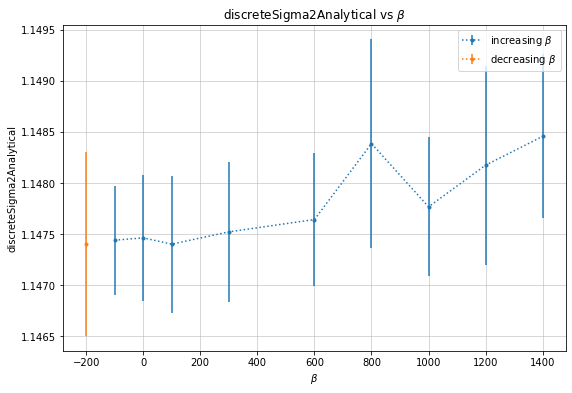

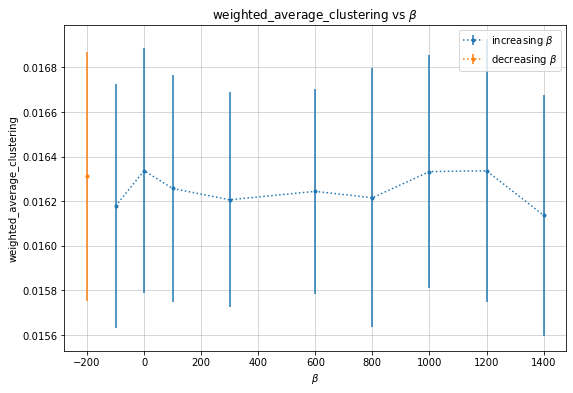

In [ ]:
#-------------------------------------------------------------------
# Analyse 'r_ER-100-p0.1-InDegree-NoSelf-RandomW'
#--------------------------------------------------------------------

from metropolisHastings import loadFromPickle

pickleroot = f'{DATAFOLDER}/r_ER-100-p0.1-InDegree-NoSelf-RandomW'

result = loadFromPickle(pickleroot=pickleroot, measurenames=['discreteSigma2Analytical','weighted_average_clustering'], gml=False, errorbar=True, title=None, figsize=None)

    # name like r_Gcatu_TSE_up_beta_3000.pkl
    #     E.G. PICKLEROOT='r_Gcatu_TSE_'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


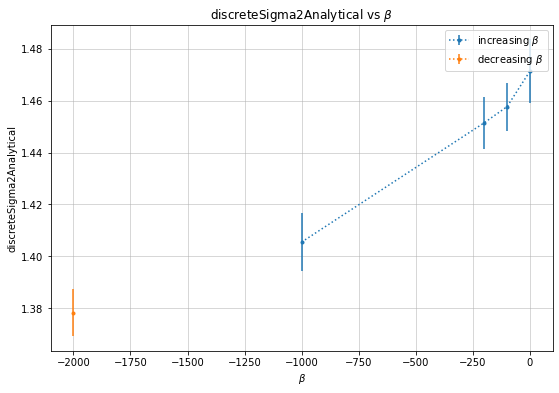

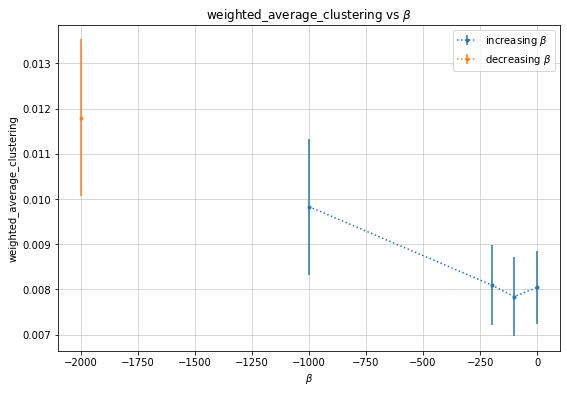

In [ ]:
#-------------------------------------------------------------------
# Analyse 'r_ER-100-p0.1-InDegree-NoSelf-RandomW'
#--------------------------------------------------------------------

from metropolisHastings import loadFromPickle

pickleroot = f'{DATAFOLDER}/r_ER-100-p0.05-InDegree-NoSelf-RandomW'

result = loadFromPickle(pickleroot=pickleroot, measurenames=['discreteSigma2Analytical','weighted_average_clustering'], gml=False, errorbar=True, title=None, figsize=None)

    # name like r_Gcatu_TSE_up_beta_3000.pkl
    #     E.G. PICKLEROOT='r_Gcatu_TSE_'